#Proyecto

##Extraccion de datos

Los datos de cada tienda están disponibles en archivos CSV y se cargarán utilizando código.

El código extrae información de las cuatro tiendas y organiza los datos en DataFrames utilizando la biblioteca Pandas.

Los datos se almacenan en DataFrames: cada tienda tiene su propio conjunto de datos (tienda1, tienda2, tienda3 y tienda4), y debes usarlos para los siguientes pasos del desafío.

In [60]:

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from matplotlib.patches import Patch
import folium
from folium.plugins import HeatMap
import numpy as np
from folium.plugins import MarkerCluster, MiniMap, Fullscreen
import matplotlib.colors as mcolors

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)


Verificación de los datos cargados en los diversos DataFrames

In [61]:

print("Información tienda 1:")
display(tienda1.head())

print("\nInformación tienda 2:")
display(tienda2.head())

print("\nInformación tienda 3:")
display(tienda3.head())

print("\nInformación tienda 4:")
display(tienda4.head())

Información tienda 1:


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359



Información tienda 2:


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Silla de oficina,Muebles,283600.0,15300.0,04/08/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
1,Pandereta,Instrumentos musicales,76800.0,2300.0,26/11/2020,Blanca Ramirez,Medellín,3,Tarjeta de crédito,4,6.25184,-75.56359
2,Cama king,Muebles,443300.0,23800.0,22/10/2021,Izabela de León,Pereira,5,Tarjeta de crédito,10,4.81333,-75.69611
3,Cama king,Muebles,906200.0,46400.0,04/05/2022,Maria Alfonso,Cali,5,Tarjeta de crédito,10,3.43722,-76.52250
4,Silla de oficina,Muebles,397800.0,19400.0,26/02/2022,Lucas Olivera,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175



Información tienda 3:


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Secadora de ropa,Electrodomésticos,1285100.0,66600.0,17/12/2021,Camila Rivera,Santa Marta,4,Tarjeta de crédito,4,11.24079,-74.19904
1,Mesa de noche,Muebles,290100.0,13600.0,10/02/2021,Maria Alfonso,Cali,3,Tarjeta de crédito,1,3.43722,-76.52250
2,Guitarra acústica,Instrumentos musicales,303500.0,17400.0,22/01/2023,Lucas Olivera,Bogotá,5,Tarjeta de crédito,3,4.60971,-74.08175
3,Balón de voleibol,Deportes y diversión,58800.0,3300.0,22/03/2022,Pedro Gomez,Barranquilla,4,Tarjeta de crédito,6,10.96854,-74.78132
4,Armario,Muebles,521100.0,25900.0,12/01/2022,Blanca Ramirez,Bogotá,1,Tarjeta de crédito,1,4.60971,-74.08175



Información tienda 4:


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Lavavajillas,Electrodomésticos,1084800.0,56000.0,11/11/2022,Rafael Acosta,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175
1,Cama box,Muebles,473800.0,25400.0,03/01/2020,Izabela de León,Cúcuta,5,Tarjeta de crédito,2,7.89391,-72.50782
2,Balón de baloncesto,Deportes y diversión,23700.0,0.0,25/12/2022,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359
3,Modelado predictivo,Libros,57700.0,1300.0,23/11/2021,Lucas Olivera,Medellín,3,Nequi,1,6.25184,-75.56359
4,Auriculares,Electrónicos,138900.0,5600.0,25/04/2022,Blanca Ramirez,Bogotá,4,Tarjeta de crédito,7,4.60971,-74.08175


Creamos columna "sucursal" en cada dataframe para identificar cada tienda



In [62]:
tienda1['sucursal'] = 1
tienda2['sucursal'] = 2
tienda3['sucursal'] = 3
tienda4['sucursal'] = 4

display(tienda1.sample(5),tienda1.shape)
display(tienda2.sample(5),tienda2.shape)
display(tienda3.sample(5),tienda3.shape)
display(tienda4.sample(5),tienda4.shape)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,sucursal
1452,Smartwatch,Electrónicos,142000.0,8200.0,10/03/2020,Camila Rivera,Bogotá,4,Nequi,1,4.60971,-74.08175,1
1737,Secadora de ropa,Electrodomésticos,686500.0,37200.0,03/09/2021,Camila Rivera,Pereira,1,Tarjeta de crédito,1,4.81333,-75.69611,1
1895,Mesa de centro,Muebles,142800.0,8000.0,28/10/2022,Maria Alfonso,Cali,5,Tarjeta de crédito,6,3.43722,-76.52250,1
847,Mesa de noche,Muebles,263700.0,12200.0,22/07/2020,Rafael Acosta,Bogotá,5,Tarjeta de crédito,2,4.60971,-74.08175,1
742,Dinosaurio Rex,Juguetes,17300.0,0.0,18/05/2020,Camila Rivera,Bogotá,4,Tarjeta de crédito,7,4.60971,-74.08175,1


(2359, 13)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,sucursal
1332,Balón de baloncesto,Deportes y diversión,53000.0,7500.0,09/02/2022,Juan Fernandez,Bucaramanga,5,Tarjeta de crédito,1,7.12539,-73.11980,2
1784,Auriculares con micrófono,Electrónicos,78100.0,2300.0,18/12/2021,Felipe Santos,Bogotá,3,Tarjeta de débito,1,4.60971,-74.08175,2
452,Mesa de centro,Muebles,178700.0,15400.0,01/07/2021,Izabela de León,Medellín,5,Nequi,1,6.25184,-75.56359,2
2315,Mesa de noche,Muebles,259000.0,12000.0,22/02/2023,Juan Fernandez,Bogotá,5,Tarjeta de crédito,4,4.60971,-74.08175,2
2019,Set de ollas,Artículos para el hogar,194000.0,8500.0,15/07/2021,Camila Rivera,Bogotá,5,Tarjeta de crédito,1,4.60971,-74.08175,2


(2359, 13)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,sucursal
140,Asistente virtual,Electrónicos,262600.0,12200.0,17/02/2021,Lucas Olivera,Cali,1,Tarjeta de crédito,8,3.43722,-76.52250,3
2163,Balón de voleibol,Deportes y diversión,52100.0,3200.0,22/11/2022,Ángel Rodriguez,Medellín,5,Tarjeta de crédito,1,6.25184,-75.56359,3
1534,Mesa de comedor,Muebles,339400.0,16300.0,27/12/2020,Felipe Santos,Bogotá,5,Tarjeta de débito,1,4.60971,-74.08175,3
1831,Iphone 15,Electrónicos,2574700.0,137500.0,23/08/2022,Rafael Acosta,Bucaramanga,2,Tarjeta de crédito,10,7.12539,-73.11980,3
113,Smartwatch,Electrónicos,207800.0,9300.0,19/07/2022,Pedro Gomez,Bogotá,4,Tarjeta de crédito,2,4.60971,-74.08175,3


(2359, 13)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,sucursal
769,Pandereta,Instrumentos musicales,91200.0,11700.0,15/07/2022,Santiago Silva,Bogotá,1,Tarjeta de crédito,3,4.60971,-74.08175,4
511,Ciencia de datos con Python,Libros,61600.0,3700.0,21/01/2020,Felipe Santos,Bucaramanga,2,Tarjeta de crédito,5,7.12539,-73.11980,4
753,Carrito de control remoto,Juguetes,79000.0,2400.0,08/03/2023,Santiago Silva,Medellín,5,Cupón,1,6.25184,-75.56359,4
272,Muñeca bebé,Juguetes,47000.0,0.0,28/06/2020,Beatriz Morales,Medellín,2,Tarjeta de crédito,1,6.25184,-75.56359,4
429,Mesa de centro,Muebles,147700.0,8100.0,02/10/2021,Izabela de León,Pereira,4,Tarjeta de crédito,2,4.81333,-75.69611,4


(2358, 13)

##Combinar datos de las tiendas

se juntaran los datos en un solo DataFrame para facilitar el tratamiento de estos

In [63]:
tienda_general = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

display(tienda_general.sample(10))
display(tienda_general.shape)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,sucursal
3021,Mesa de centro,Muebles,193900.0,10700.0,04/05/2022,Beatriz Morales,Cartagena,4,Tarjeta de crédito,6,10.39972,-75.51444,2
4431,Juego de mesa,Juguetes,161400.0,8800.0,27/06/2022,Lucas Olivera,Medellín,5,Tarjeta de crédito,1,6.25184,-75.56359,2
8553,Carrito de control remoto,Juguetes,64300.0,3800.0,11/06/2021,Mariana Herrera,Bogotá,4,Tarjeta de crédito,10,4.60971,-74.08175,4
2769,Smartwatch,Electrónicos,215100.0,11700.0,15/03/2021,Camila Rivera,Medellín,2,Tarjeta de crédito,6,6.25184,-75.56359,2
6701,Dinosaurio Rex,Juguetes,20700.0,1500.0,15/07/2020,Beatriz Morales,Cali,5,Tarjeta de crédito,5,3.43722,-76.52250,3
3300,Auriculares con micrófono,Electrónicos,45700.0,2900.0,19/03/2021,Santiago Silva,Riohacha,5,Tarjeta de crédito,10,11.54444,-72.90722,2
3755,Muñeca bebé,Juguetes,40400.0,0.0,23/01/2021,Blanca Ramirez,Medellín,3,Tarjeta de crédito,1,6.25184,-75.56359,2
6122,Dinosaurio Rex,Juguetes,17300.0,0.0,16/05/2022,Camila Rivera,Pereira,5,Nequi,1,4.81333,-75.69611,3
2970,Dinosaurio Rex,Juguetes,17300.0,1300.0,17/01/2023,Lucas Olivera,Medellín,3,Tarjeta de crédito,3,6.25184,-75.56359,2
3550,Mesa de centro,Muebles,164300.0,9100.0,18/03/2021,Maria Alfonso,Bogotá,5,Tarjeta de crédito,4,4.60971,-74.08175,2


(9435, 13)

Limpieza de archivo, eliminación de datos no utilizados ( Fecha de Compra ,	Vendedor , Lugar de Compra , Cantidad de cuotas)

In [64]:
tienda_general.drop(['Fecha de Compra','Vendedor','Lugar de Compra','Cantidad de cuotas'],axis=1,inplace=True)
tienda_general.head(1)

,Producto,Categoría del Producto,Precio,Costo de envío,Calificación,Método de pago,lat,lon,sucursal
0,Asistente virtual,Electrónicos,164300.0,6900.0,4,Tarjeta de crédito,4.60971,-74.08175,1


##Calculos por tienda

###Ingresos por tienda

Calculamos el ingreso total de las tiendas, partiendo del nuevo dataframe "tienda_general", por fines de visualización se "reducen" los numeros en 1 Millón

In [65]:
tienda_general['precio_millones'] = tienda_general['Precio']/1000000
ingreso_tiendas = tienda_general.groupby('sucursal',as_index=False)['precio_millones'].sum()
ingreso_tiendas

,sucursal,precio_millones
0,1,1150.8804
1,2,1116.3435
2,3,1098.0196
3,4,1038.3757


Participación ingresos por tienda, transformamos los datos a porciones (%) para poder mostrar graficamente

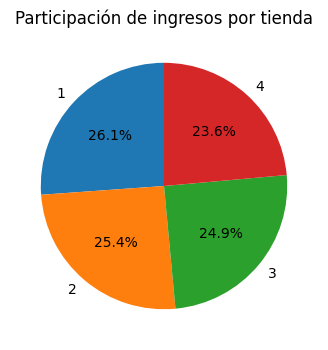

In [66]:
 plt.figure(figsize=(6,4))

plt.pie(ingreso_tiendas['precio_millones'], labels=ingreso_tiendas['sucursal'], autopct='%1.1f%%', startangle=90)
plt.title('Participación de ingresos por tienda')

plt.savefig('/content/drive/MyDrive/Alura_Store/imagenes/img1.png',dpi=300,bbox_inches='tight')

plt.show()
plt.close()

###Ganancia por tienda

se crea una nueva columna denomidada "Ganancia" la cual nos permitira visualizar de manera mas sencilla el remanente del precio, quitando el costo de envio

In [67]:
tienda_general['Ganancia'] = tienda_general['Precio']-tienda_general['Costo de envío']
tienda_general.head(15)


,Producto,Categoría del Producto,Precio,Costo de envío,Calificación,Método de pago,lat,lon,sucursal,precio_millones,Ganancia
0,Asistente virtual,Electrónicos,164300.0,6900.0,4,Tarjeta de crédito,4.60971,-74.08175,1,0.1643,157400.0
1,Mesa de comedor,Muebles,192300.0,8400.0,1,Tarjeta de crédito,6.25184,-75.56359,1,0.1923,183900.0
2,Juego de mesa,Juguetes,209600.0,15900.0,1,Tarjeta de crédito,10.39972,-75.51444,1,0.2096,193700.0
3,Microondas,Electrodomésticos,757500.0,41000.0,4,Nequi,3.43722,-76.52250,1,0.7575,716500.0
4,Silla de oficina,Muebles,335200.0,20200.0,5,Nequi,6.25184,-75.56359,1,0.3352,315000.0
5,Bloques de construcción,Juguetes,24200.0,0.0,5,Cupón,3.43722,-76.52250,1,0.0242,24200.0
6,Muñeca bebé,Juguetes,44200.0,0.0,3,Nequi,4.60971,-74.08175,1,0.0442,44200.0
7,Lavavajillas,Electrodomésticos,1189700.0,63700.0,5,Tarjeta de crédito,11.24079,-74.19904,1,1.1897,1126000.0
8,Lavadora de ropa,Electrodomésticos,1518200.0,79000.0,1,Tarjeta de crédito,4.60971,-74.08175,1,1.5182,1439200.0
9,Carrito de control remoto,Juguetes,75200.0,5100.0,5,Nequi,4.60971,-74.08175,1,0.0752,70100.0


Se crea una nueva columna, de igual manera para simplificar la lectura, denominada "Ganancia_millones"

In [68]:
tienda_general['Ganancia_millones'] = tienda_general['Ganancia']/1000000

ganancia_tiendas = tienda_general.groupby('sucursal',as_index=False)['Ganancia_millones'].sum()

In [69]:
tienda_general.head(2)

,Producto,Categoría del Producto,Precio,Costo de envío,Calificación,Método de pago,lat,lon,sucursal,precio_millones,Ganancia,Ganancia_millones
0,Asistente virtual,Electrónicos,164300.0,6900.0,4,Tarjeta de crédito,4.60971,-74.08175,1,0.1643,157400.0,0.1574
1,Mesa de comedor,Muebles,192300.0,8400.0,1,Tarjeta de crédito,6.25184,-75.56359,1,0.1923,183900.0,0.1839


###Grafica ingresos vs ganancias

Tomando las variables obetnidas de la sumatoria de los ingresos individuales, y de las ganancias individuales, de cada sucusrsal se procede a graficar, para permitir tener una mejor apreciación visual del estado de cada tienda


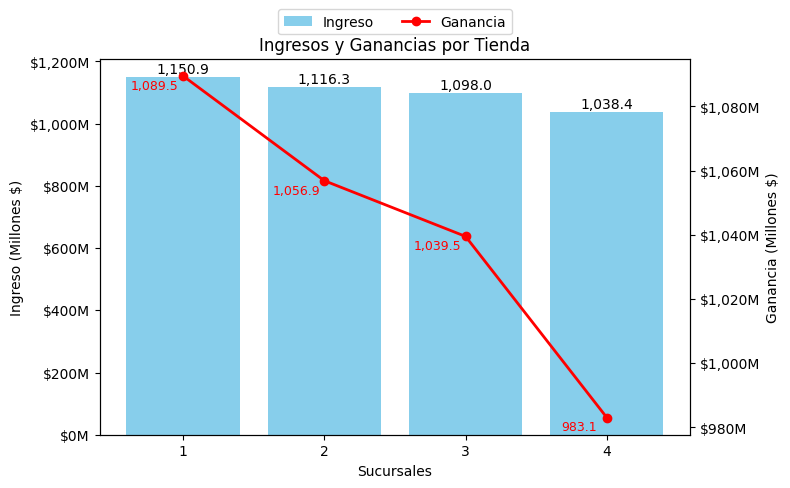

,sucursal,precio_millones,Ganancia_millones
0,1,1150.8804,1089.5025
1,2,1116.3435,1056.8584
2,3,1098.0196,1039.5030
3,4,1038.3757,983.0583


In [70]:
df = ingreso_tiendas.merge(ganancia_tiendas, on='sucursal')

# Crear figura y eje pricipal
fig, ax = plt.subplots(figsize=(8,5))
bars = ax.bar(df.index, df['precio_millones'], color='skyblue', label='Ingreso')
ax.set_xticks(df.index)                  # posiciones 0,1,2,3
ax.set_xticklabels(df['sucursal'])       # etiquetas reales de sucursal

# Segundo eje → línea de ganancia
ax2 = ax.twinx() #Crea un eje "gemelo" para la segunda grafica
ax2.plot(df.index, df['Ganancia_millones'], color='red', marker='o', linewidth=2, label='Ganancia')
ax.set_xlabel('Sucursales')

# Formato de ejes, los primeros son referentes a los numeros
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}M'))
ax2.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}M'))
ax.set_ylabel('Ingreso (Millones $)')
ax2.set_ylabel('Ganancia (Millones $)')
plt.title('Ingresos y Ganancias por Tienda')
plt.xticks(rotation=0)

#Etiquetas sobre cada barra
for p in bars:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height + 2,
            f'{height:,.1f}', ha='center', va='bottom')

x_pos = [p.get_x() + p.get_width()/2 for p in bars] #centros exactos de barras
for x, value in zip(x_pos, df['Ganancia_millones']):
    ax2.text(x=x-0.2, y=value - 1, s=f'{value:,.1f}', ha='center',
        va='top', color='red', fontsize=9)

# Leyendas combinadas
handles1, labels1 = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles = handles1 + handles2
labels = labels1 + labels2
ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2)

plt.tight_layout()


fig.savefig('/content/drive/MyDrive/Alura_Store/imagenes/img2.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close(fig)

df

###Categorias populares

se agrupan los productos por categoria, y por sucursal, para poder mostrar de manera grafica, en donde esta concentrada la mayor porcion de compras o  popularidad

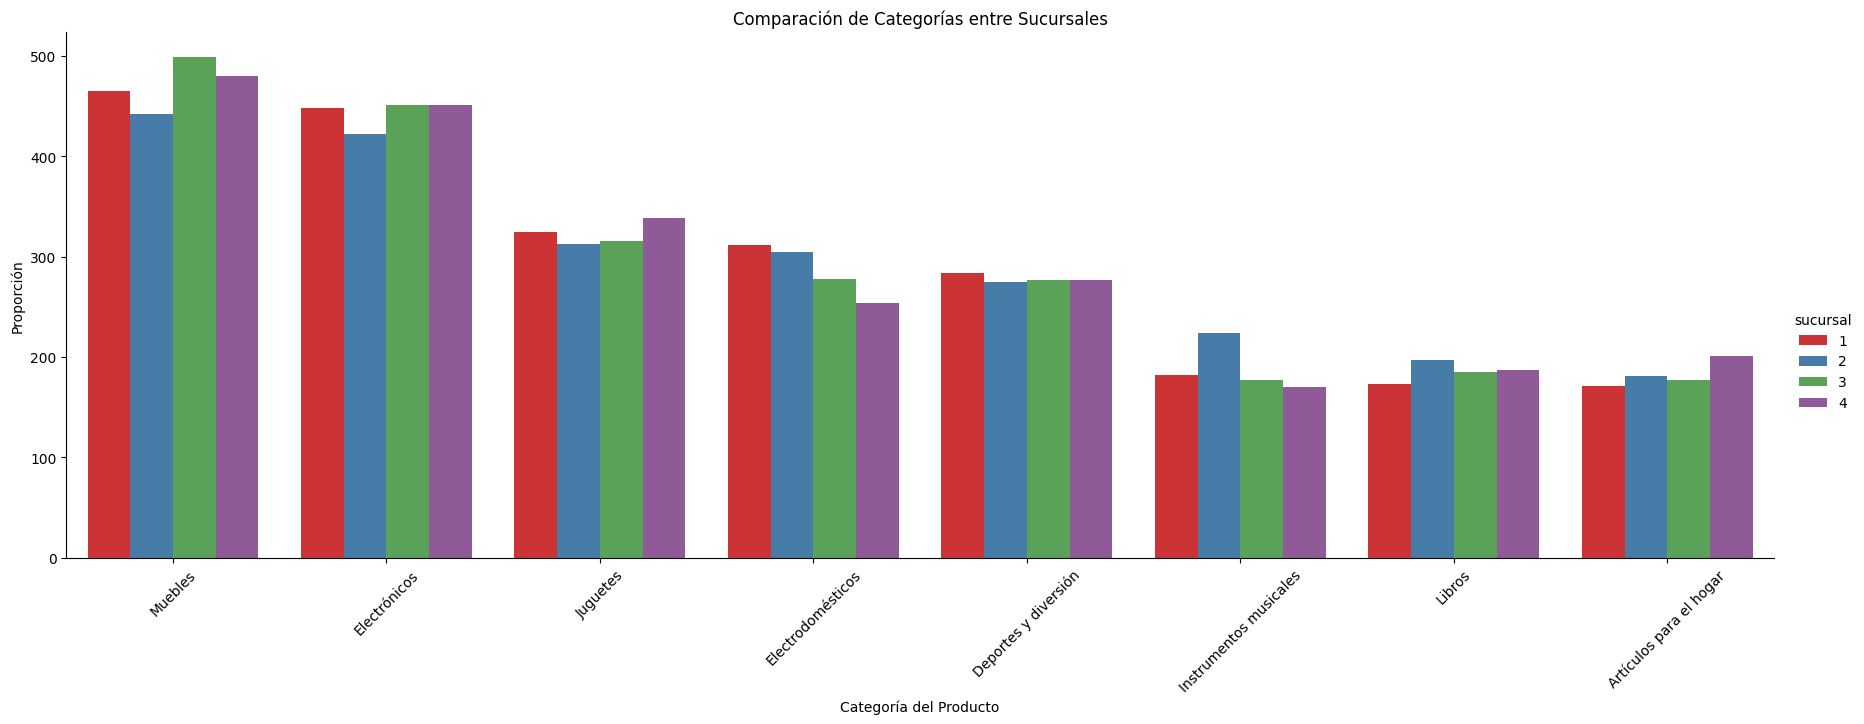

In [71]:
categorias_populares = tienda_general.groupby('sucursal',as_index=False)['Categoría del Producto'].value_counts(normalize=0)
g = sns.catplot(data=categorias_populares, x='Categoría del Producto', y='count', hue='sucursal', kind='bar', height=6, aspect=3,palette='Set1')
plt.xticks(rotation=45)
plt.ylabel('Proporción')
plt.title('Comparación de Categorías entre Sucursales')

g.fig.savefig('/content/drive/MyDrive/Alura_Store/imagenes/img3.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close(g.fig)


###Productos por tienda


de manera individual por producto se hace el recuento de ventas, para tener cuales son los productos mas y menos vendidos globalmente en el negocio

In [72]:
productos_totales = tienda_general['Producto'].value_counts().reset_index()
productos_totales.columns = ['Producto', 'ventas_totales']

productos_totales

,Producto,ventas_totales
0,Mesa de noche,210
1,Carrito de control remoto,206
2,Microondas,206
3,Batería,203
4,Cama king,201
5,Secadora de ropa,200
6,Modelado predictivo,200
7,Set de ollas,200
8,Cama box,199
9,Bloques de construcción,199


se seccionan y guardan en variables, los 5 valores mas y menos vendidos respectivamente a nivel global del negocio

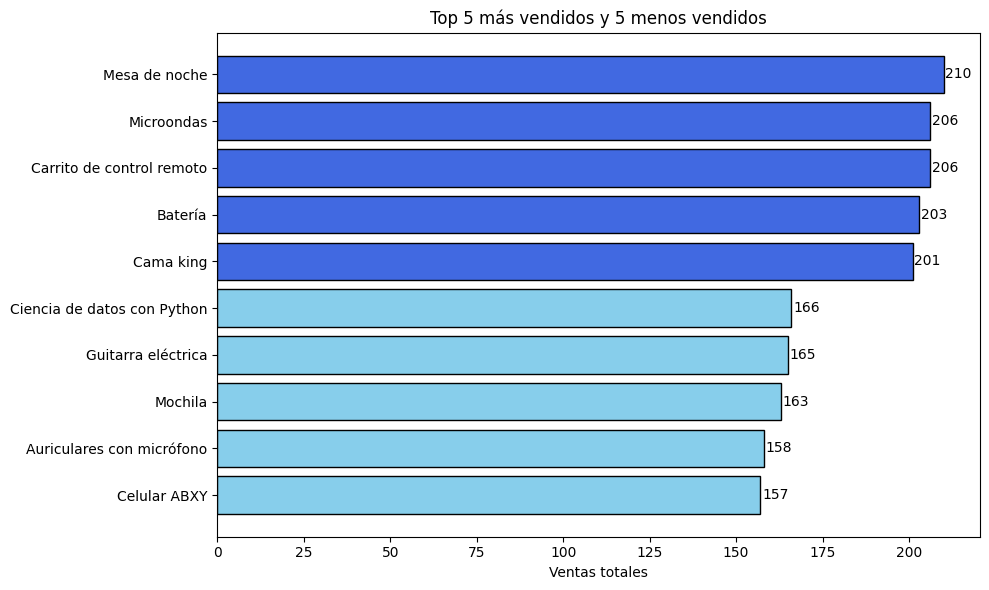

In [73]:
top5 = productos_totales.nlargest(5, 'ventas_totales')
bottom5 = productos_totales.nsmallest(5, 'ventas_totales')

# Combinar para graficar
df_grafico = pd.concat([top5, bottom5])
df_grafico = df_grafico.sort_values('ventas_totales')  # para barra horizontal, de menor a mayor

colores = ['skyblue']*5 + ['royalblue']*5

# creamos la figura
plt.figure(figsize=(10,6))
bahr = plt.barh(df_grafico['Producto'], df_grafico['ventas_totales'], color=colores, edgecolor='black')

# Agregar etiquetas de ventas al final de cada barra
for i, val in enumerate(df_grafico['ventas_totales']):
    plt.text(val + 0.5, i, str(int(val)), va='center', fontsize=10)

plt.xlabel('Ventas totales')
plt.title('Top 5 más vendidos y 5 menos vendidos')
plt.tight_layout()

plt.gcf().savefig('/content/drive/MyDrive/Alura_Store/imagenes/img4.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

Se separan por los productos mas y menos vendidos de cada una de las sucursales

In [74]:
productos_populares = tienda_general.groupby('sucursal')['Producto'].value_counts().reset_index(name='ventas')
top_5= (productos_populares.groupby('sucursal',group_keys=False).apply(lambda x: x.nlargest(5,'ventas')))
bottom_5=(productos_populares.groupby('sucursal',group_keys=False).apply(lambda x: x.nsmallest(5,'ventas')))
print('5 mas populares:')
display(top_5)
print('\n5 menos populares:')
display(bottom_5)

5 mas populares:


/tmp/ipython-input-1113283720.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5= (productos_populares.groupby('sucursal',group_keys=False).apply(lambda x: x.nlargest(5,'ventas')))
/tmp/ipython-input-1113283720.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bottom_5=(productos_populares.groupby('sucursal',group_keys=False).apply(lambda x: x.nsmallest(5,'ventas')))


,sucursal,Producto,ventas
0,1,Armario,60
1,1,Microondas,60
2,1,TV LED UHD 4K,60
3,1,Secadora de ropa,58
4,1,Bloques de construcción,56
51,2,Iniciando en programación,65
52,2,Microondas,62
53,2,Batería,61
54,2,Guitarra acústica,58
55,2,Pandereta,58



5 menos populares:


,sucursal,Producto,ventas
49,1,Auriculares con micrófono,33
50,1,Celular ABXY,33
48,1,Olla de presión,35
47,1,Pandereta,36
45,1,Ciencia de datos con Python,39
101,2,Juego de mesa,32
99,2,Impresora,34
100,2,Mesa de comedor,34
98,2,Sillón,35
97,2,Auriculares,37


se grafican de manera separada cada una de las sucursales y sus respectivos productos para una mejor visualización

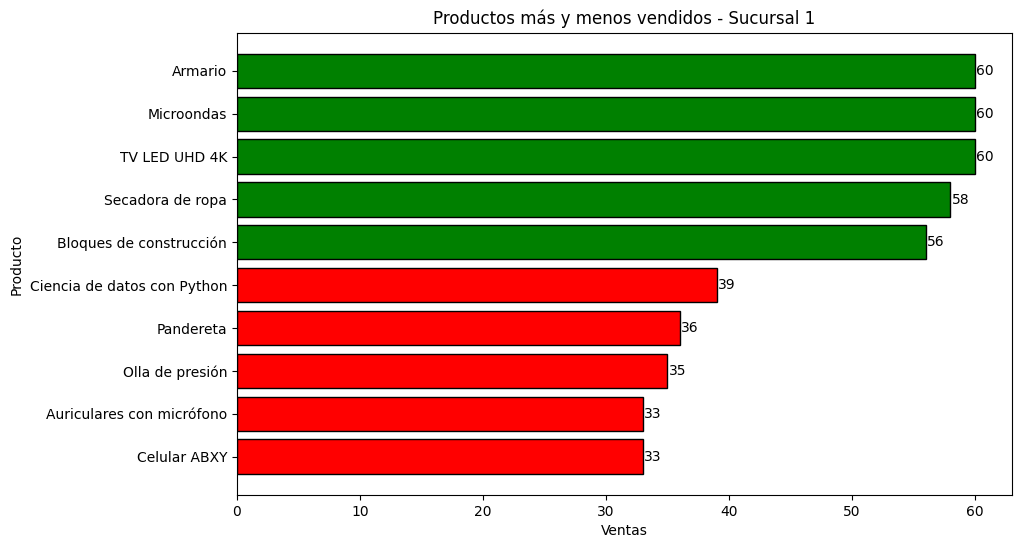

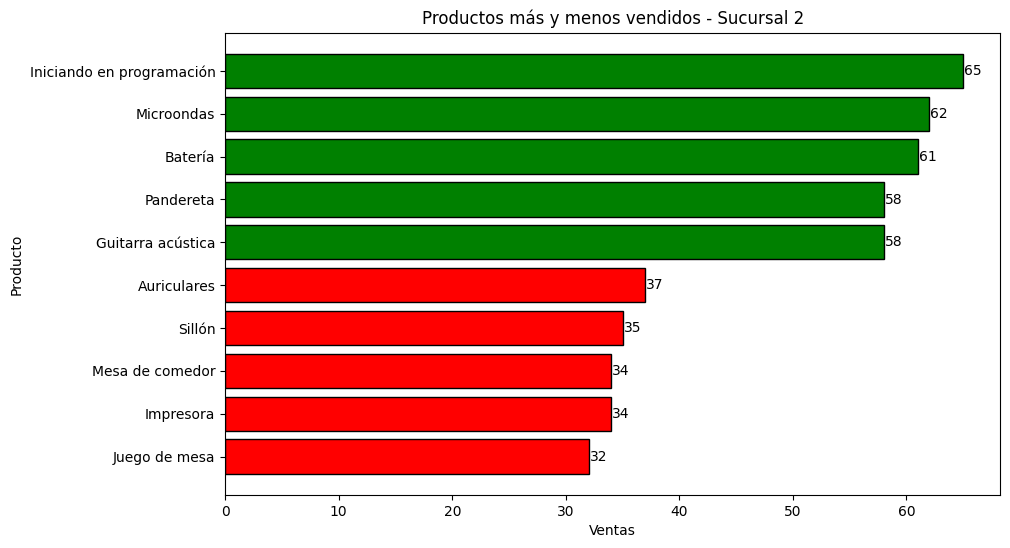

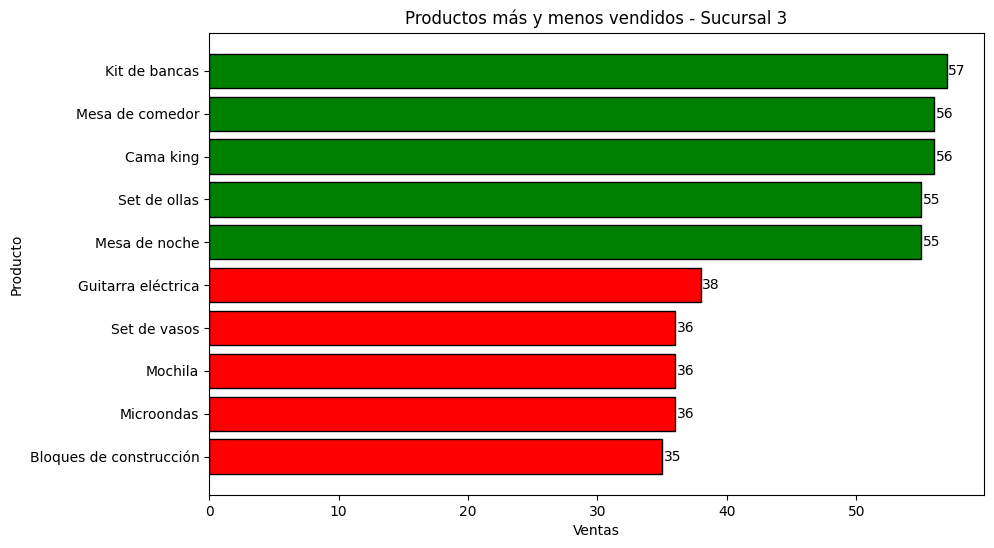

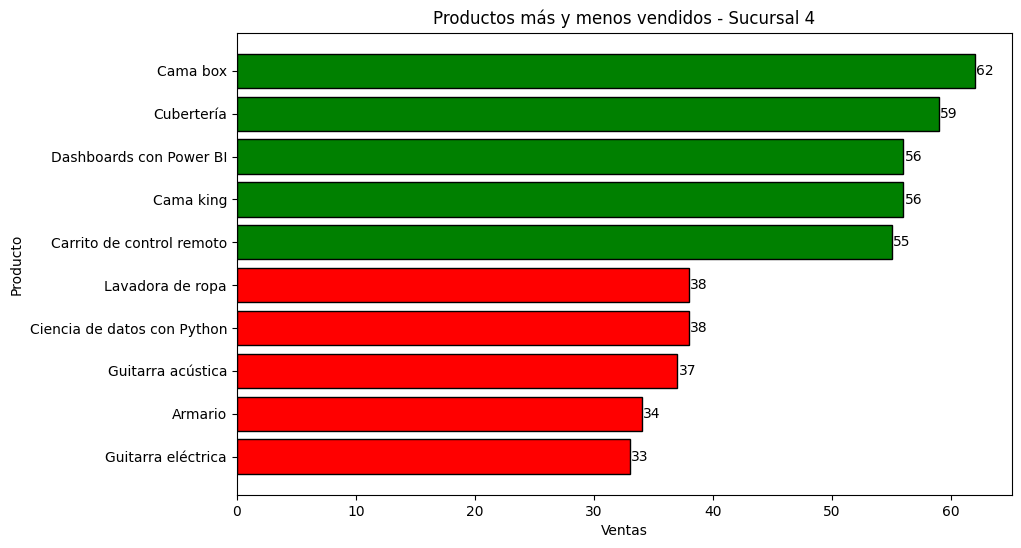

In [75]:
sucursales = sorted(productos_populares['sucursal'].unique())

for suc in sucursales:
    # Filtrar top y bottom por sucursal
    top_suc = top_5.query('sucursal == @suc')
    bottom_suc = bottom_5.query('sucursal == @suc')

    # Combinar para graficar
    df_graf = pd.concat([top_suc, bottom_suc])
    df_graf = df_graf.sort_values('ventas', ascending=True)  # para barras horizontales ordenadas

    colores = ['green' if row['Producto'] in top_suc['Producto'].values else 'red' for _, row in df_graf.iterrows()]

    # creamos figura
    plt.figure(figsize=(10,6))
    bars = plt.barh(df_graf['Producto'], df_graf['ventas'], color=colores, edgecolor='black')

    # Agregar valores al final de cada barra
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 0.1, bar.get_y() + bar.get_height()/2, str(int(width)), va='center')

    plt.title(f'Productos más y menos vendidos - Sucursal {suc}')
    plt.xlabel('Ventas')
    plt.ylabel('Producto')

    plt.gcf().savefig(f'/content/drive/MyDrive/Alura_Store/imagenes/img5_{suc}.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()



###Valoración media

se realiza obtiene la calificación promedio de cada una de las sucursales

In [76]:
media_valoracion_tienda = tienda_general.groupby('sucursal')['Calificación'].mean()
display(media_valoracion_tienda.sort_values(ascending=False))

,Calificación
sucursal,
3,4.048326
2,4.037304
4,3.995759
1,3.976685


###Valor promedio del envio



se obtiene el costo promedio del envio por cada una de las sucursales

In [77]:
media_envio_tienda = tienda_general.groupby('sucursal')['Costo de envío'].mean()

media_envio_tienda = media_envio_tienda.apply(lambda x: f"{x:,.2f}")

print("valor promedio del envio por tienda:")
display(media_envio_tienda)



valor promedio del envio por tienda:


,Costo de envío
sucursal,
1,"26,018.61"
2,"25,216.24"
3,"24,805.68"
4,"23,459.46"


###Metodos de pago por sucursal


calculamos el "usaje" de cada tipo de forma de pago, por sucursal y  lo mostramos graficamente

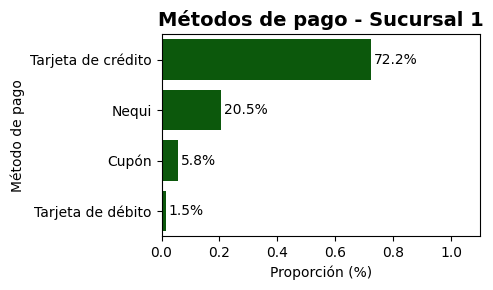

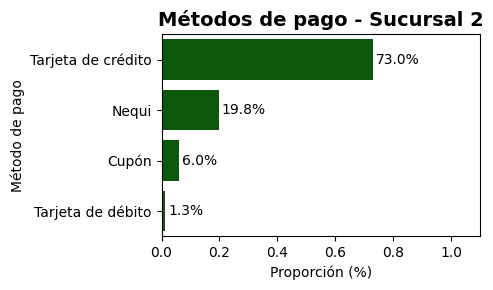

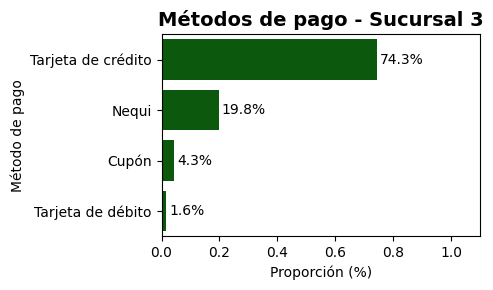

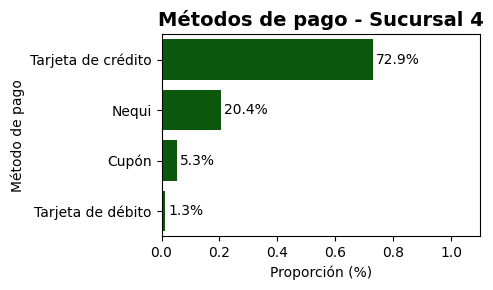

In [78]:
metodos_pago = tienda_general.groupby('sucursal', as_index=False)['Método de pago'].value_counts(normalize=True)
metodos_pago = metodos_pago.rename(columns={'count': 'proportion'})

sucursales = sorted(metodos_pago['sucursal'].unique())

for suc in sucursales:
    # Filtrar datos de la sucursal actual
    df_suc = metodos_pago.query('sucursal == @suc').copy()
    df_suc = df_suc.sort_values('proportion', ascending=False)

    # Crear gráfico de barras horizontal
    plt.figure(figsize=(5,3))
    sns.barplot( x='proportion', y='Método de pago', data=df_suc, color='darkgreen')
    # Mostrar porcentaje al final de cada barra
    for i, row in enumerate(df_suc.itertuples()):
        plt.text(row.proportion + 0.01, i, f"{row.proportion*100:.1f}%", va='center')

    # Ajustes de gráfico
    plt.xlim(0, 1.1)  # ajustar eje x al 100%
    plt.xlabel('Proporción (%)')
    plt.ylabel('Método de pago')
    plt.title(f'Métodos de pago - Sucursal {suc}', fontsize=14, fontweight='bold')
    plt.tight_layout()

    plt.gcf().savefig(f'/content/drive/MyDrive/Alura_Store/imagenes/img6_{suc}.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()



###desempeño geográfico

Realizamos un Heatmap del desempeño geografico, para visualizar cuales son las zonas con mas ventas

In [79]:
# verifica que las coordenadas esten en valor tipo float, para que considere el punto
tienda_general['lat'] = tienda_general['lat'].astype(float)
tienda_general['lon'] = tienda_general['lon'].astype(float)
tienda_general['Ganancia'] = pd.to_numeric(tienda_general['Ganancia'], errors='coerce') # coerce, ayuda a que detecta un valor no valido, en lugar de sacar error lo cataloge como NaN

# crea y nombra el mapa base/ libreria -mapa interactivo / uso del promedio de lat y lon como punto central / zoom inicial
mapa_heat = folium.Map(location=[tienda_general['lat'].mean(), tienda_general['lon'].mean()],zoom_start=6)

# Preparar datos para HeatMap: [lat, lon, importancia- valor] //  crea un punto para cada indice, con los valores de (lat, log, peso) en tienda
heat_data = [[row['lat'], row['lon'], row['Ganancia_millones']] for index, row in tienda_general.iterrows()]

# Agregar Heat_data a la libreria de HeatMao, con sus respectivo calores en un radio de 25 pixeles y un zoom maximo de 13, para despues agregarlo al mapa_heat _( mapa inicial)
HeatMap(heat_data, radius=25, max_zoom=10).add_to(mapa_heat)

# Mostrar mapa en notebook
mapa_heat.save('/content/drive/MyDrive/Alura_Store/mapas/mapa_heat.html')
mapa_heat

se crea un mapo de disperción geografica para visualizar ahora con valores, la distribución de ventas

In [80]:
# Crear mapa base "mapa_disp" con punto central el pormedio de lat y lon, iniciando en un zoom de 6, y un cuadro de escala /// CartoDB positron es nombre predefinido
mapa_disp = folium.Map(location=[tienda_general['lat'].mean(), tienda_general['lon'].mean()],zoom_start=6, tiles='CartoDB positron', control_scale=True)
# 1. revisa que todos los valores sean validos si no agrega un NaN, y los pasa a array de numpy
vals = tienda_general['Ganancia_millones'].fillna(0).values
vals_scaled = np.log1p(vals)  # reduce efecto de valores extremos, los calcula a logaritmo natural (1+x)
min_v, max_v = vals_scaled.min(), vals_scaled.max()

def scale_radius(x, amin=min_v, amax=max_v, out_min=4, out_max=30):
    #Escala logarítmicamente el tamaño del círculo
    if amax == amin:
      #evitamos divición entre 0
        return (out_min + out_max) / 2
    return out_min + ((x - amin) / (amax - amin)) * (out_max - out_min)

# generamos una lista con las diferentes sucursales
sucursales = tienda_general['sucursal'].unique()
n = len(sucursales)

""" creamos paleta de colores de la libreria matplotlib a la variable cmap //
asignamos a la variable palette , un codigo de rgb en valor hexadecimal para cada valor i correspondiente a cada sucursal //
se asigna a la variable colores_sucursar un color ya establecido"""
cmap = plt.get_cmap('tab20')
palette = [mcolors.rgb2hex(cmap(i % cmap.N)) for i in range(n)]
colores_sucursal = {s: palette[i] for i, s in enumerate(sucursales)}

# crea un "cluster" con valores cercanos, agrupa
cluster = MarkerCluster(name='Sucursales agrupadas').add_to(mapa_disp)

# Añadir círculos al mapa
for row in tienda_general.itertuples(index=False):
    lat = getattr(row, 'lat')
    lon = getattr(row, 'lon')
    suc = getattr(row, 'sucursal')
    prod = getattr(row, 'Producto', '')
    gan = getattr(row, 'Ganancia_millones', 0)

    # Calcular radio escalado
    rad = scale_radius(np.log1p(gan))
    color = colores_sucursal.get(suc, 'gray')

    # Tooltip libreria para mostrar información al pasar el raton
    tooltip = folium.Tooltip(f"{suc} — {prod} — {gan} M")

    # Popup muestra información al  hacer clic
    popup_html = f"""
    <b>Sucursal:</b> {suc}<br>
    <b>Producto:</b> {prod}<br>
    <b>Ganancia:</b> {gan} M
    """

    folium.CircleMarker(
        location=[lat, lon],
        radius=rad,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6,
        popup=folium.Popup(popup_html, max_width=300),
        tooltip=tooltip
    ).add_to(cluster)

#Agregar plugins de navegación
MiniMap(toggle_display=True).add_to(mapa_disp)
Fullscreen(position='topright').add_to(mapa_disp)
folium.LayerControl(collapsed=False).add_to(mapa_disp)

#Crear leyenda con los colores de sucursales
legend_html = """
<div style="position: fixed;
     bottom: 30px; left: 30px; width: 200px;
     border:2px solid grey; z-index:9999; font-size:12px;
     background-color:white; padding:8px;">
<b> -Sucursales</b><br>
"""
for suc, col in colores_sucursal.items():
    legend_html += f'<i style="background:{col};width:12px;height:12px;display:inline-block;margin-right:6px;"></i>{suc}<br>'
legend_html += "</div>"

mapa_disp.get_root().html.add_child(folium.Element(legend_html))

mapa_disp.save('/content/drive/MyDrive/Alura_Store/mapas/mapa_disp.html')
mapa_disp


Output hidden; open in https://colab.research.google.com to view.

se elabora un mapa interactivo, para mostrar graficamente la distribución de ventas por sucursal

In [ ]:
# Crear mapa base
mapa_disp = folium.Map(location=[tienda_general['lat'].mean(), tienda_general['lon'].mean()], zoom_start=6, tiles='CartoDB positron', control_scale=True)

# Validar valores y calcular logaritmo natural
vals = tienda_general['Ganancia_millones'].fillna(0).values
vals_scaled = np.log1p(vals)
min_v, max_v = vals_scaled.min(), vals_scaled.max()

def scale_radius(x, amin=min_v, amax=max_v, out_min=4, out_max=30):
    if amax == amin:
        return (out_min + out_max) / 2
    val = np.log1p(x)
    return out_min + ((val - amin) / (amax - amin)) * (out_max - out_min)

# Generar paleta de colores por sucursal
sucursales = tienda_general['sucursal'].unique()
n = len(sucursales)
cmap = plt.get_cmap('tab20')
palette = [mcolors.rgb2hex(cmap(i % cmap.N)) for i in range(n)]
colores_sucursal = {s: palette[i] for i, s in enumerate(sucursales)}


#Cluster por sucursal
clusters_suc = {s: MarkerCluster(name=f'Sucursal {s}').add_to(mapa_disp) for s in sucursales}

#Añadir círculos
for row in tienda_general.itertuples(index=False):
    lat = getattr(row, 'lat')
    lon = getattr(row, 'lon')
    suc = getattr(row, 'sucursal')
    prod = getattr(row, 'Producto', '')
    gan = getattr(row, 'Ganancia_millones', 0)

    rad = scale_radius(gan)
    color = colores_sucursal.get(suc, 'gray')

    tooltip = folium.Tooltip(f"{suc} — {prod} — {gan} M")
    popup_html = f"""
    <b>Sucursal:</b> {suc}<br>
    <b>Producto:</b> {prod}<br>
    <b>Ganancia:</b> {gan} M
    """
    # Añadir al cluster por sucursal
    folium.CircleMarker(
        location=[lat, lon],
        radius=rad,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6,
        popup=folium.Popup(popup_html, max_width=300),
        tooltip=tooltip
    ).add_to(clusters_suc[suc])

#Plugins de navegación
MiniMap(toggle_display=True).add_to(mapa_disp)
Fullscreen(position='topright').add_to(mapa_disp)
folium.LayerControl(collapsed=False).add_to(mapa_disp)

# Leyenda
legend_html = """
<div style="position: fixed;
     bottom: 30px; left: 30px; width: 200px;
     border:2px solid grey; z-index:9999; font-size:12px;
     background-color:white; padding:8px;">
<b>- Sucursales</b><br>
"""
for suc, col in colores_sucursal.items():
    legend_html += f'<i style="background:{col};width:12px;height:12px;display:inline-block;margin-right:6px;"></i>{suc}<br>'
legend_html += "</div>"

mapa_disp.get_root().html.add_child(folium.Element(legend_html))
mapa_disp.save('/content/drive/MyDrive/Alura_Store/mapas/mapa_disp_4.html')
mapa_disp


##Informe Final




I.	Informe de análisis

El objetivo de este análisis es determinar la tienda más adecuada para que el Sr. Juan conozca el estatus actual de su negocio, desde una perspectiva global como particular, considerando múltiples factores claves de análisis.

Los criterios evaluados incluyen:
1.	Ingresos y ganancias por tienda
2.	Participación de ingresos por tienda
3.	Categorías y productos más y menos vendidos
4.	Calificación promedio de clientes
5.	Métodos de pago predominantes

Se utiliza la información proporcionada por el cliente, la cual corresponde a cuatro sucursales, con ayuda de estos datos, determinaremos la rentabilidad del negocio, la participación de cada una de las sucursales, y de ser necesario un cambio de estrategia.


 II. Desarrollo del análisis

 Ingresos y participación por tienda

Tomando los datos proporcionados por el cliente, se evaluaron las cuatro sucursales, arrojando los siguientes valores en cuanto a ingresos y ganancias, las cuales se calcularon a partir de los ingresos totales, menos el costo operativo del envio, quedando de la siguiente manera:

|   sucursal |   precio_millones |   Ganancia_millones |
|-----------:|------------------:|--------------------:|
|          1 |           1150.88 |            1089.5   |
|          2 |           1116.34 |            1056.86  |
|          3 |           1098.02 |            1039.5   |
|          4 |           1038.38 |             983.058 |


De esto podemos deducir que la Sucursal 1, es la que más ingresos presenta, ligeramente superiores a las demás, seguida por las sucursales 2 y 3, para finalmente posicionar a la Sucursal 4, como la que menos ingresos ha presentado en el histórico, quedando en el mismo orden de ganancias, primero la sucursal 1 y al final la sucursal 4, todo esto muestra una uniformidad de ingresos y ganancias, lo cual gráficamente se puede mostrar de la siguiente manera:

  ![Grafico ingresos vs. ganancias](img1.png)


Teniendo una participación en los ingresos globales dentro del rango de 24%-26% por sucursal,

Siendo la que mayor participación tiene la sucursal 1 y la que menor aporte tiene la sucursal 4

![pie chart participación por sucursal](img2.png)


Otro aspecto para considerar para la viabilidad de las sucursales es el costo promedio de envió, si bien no es un valor exacto, ya que depende del destino final del producto, se obtuvo el promedio, tomando en cuenta los valores históricos presentes en cada sucursal, siendo los siguientes:


|Sucursal | Costo de envío   |
|---------|:-----------------|
| 1|26,018.61        |
| 2|25,216.24        |
| 3|24,805.68        |
| 4|23,459.46        |



Teniendo el promedio de los costos por sucursal se puede determinar que el menor costo operativo de envió es la sucursal 4 y la que genera mayores costos es la sucursal 1.


Gracias a todo esto, podemos determinar que, aunque la sucursal 4 es la que menos costo operativo presenta, también es la que tiene una contribución menos a las ganancias globales, por lo que se debe de buscar una estrategia que le ayude a posicionarse de mejor manera en el mercado.

 Categorías y productos más y menos vendidos

De acuerdo con la información proporcionada, se logró obtener el concentrado y contabilizar, las ventas que se han tenido históricamente, clasificado categóricamente de la siguiente manera:


![comparación de categorías entre sucursales](img3.png)


De acuerdo con la clasificación por categorías, podemos observar que la mayor participación en ventas corresponde a:
•	Muebles
•	Electrónicos
•	Juguetes

Y por otra parte las categorías que menor participación tienen son:

•	Libros
•	Artículos para el hogar

Pasando a la evaluación de ventas por productos, obtenemos el Top 5 y Bottom 5 de esta manera:


 ![Top 5 más vendidos y 5 menos vendidos](img4.png)


El concentrado de productos con mayor y menor venta en general se puede seccionar en los siguientes artículos:

Top 5 más vendidos:
•	Mesa de noche
•	Microondas
•	Carrito de control remoto
•	Batería
•	Cama King
Bottom 5 menos vendidos:
•	Ciencia de datos con Python
•	Guitarra eléctrica
•	Mochila
•	Auriculares con micrófono
•	Celular ABXY

Siendo estos los que aportan mayores ingresos y menores ingresos a nivel global, interpolando los datos por cada sucursal, se observa que el comportamiento de las ventas por producto se modifica ligeramente, mostrando variaciones en la popularidad y volumen según la sucursal.

Top 5 categorías/productos por tienda:

 | Gráfico 1 | Gráfico 2 |
|-----------|-----------|
| ![Procutos_mas_y_menos_vendidos_Sucursal_1](img5._1.png) | ![Procutos_mas_y_menos_vendidos_Sucursal_2](img5_2.png) |

| Gráfico 3 | Gráfico 4 |
|-----------|-----------|
| ![Procutos_mas_y_menos_vendidos_Sucursal_3](img5_3.png) | !![Procutos_mas_y_menos_vendidos_Sucursal_4](img5_4.png) |



Esto nos brinda un panorama de a que segmentos se pueden dirigir las siguientes campañas, posibles movimientos de mercancía, permitiendo generar un plan de reabastecimiento, y sobre todo de control de inventario, logrando posicionar el inventario detenido en alguna sucursal donde pueda ser vendido de manera más sencilla.

Valoración del cliente

Otro aspecto a evaluar es la valoración del cliente, el cual complementa el análisis financiero, ya que refleja el potencial de sostenibilidad a largo plazo.
Una sucursal puede ser rentable hoy, pero si su calificación es baja, su permanencia futura podría verse comprometida.


Los datos de calificación promedio por sucursal fueron los siguientes:


| Sucursal |  Calificación |
|--|-------------:|
| 1|    3.97669 |
| 2|    4.0373  |
| 3|    4.04833 |
| 4|    3.99576 |


De acuerdo con estos valores, las diferencias entre sucursales son mínimas pero significativas desde la perspectiva de satisfacción del cliente. Aun cuando no está completamente relacionado el  nivel de ingreso con el promedio de calificación,  ya que como se menciona anteriormente la sucursal que mayores ingresos presenta es la sucursal 1, no es la que tiene mejor calificación individual, quedando por debajo de la sucursal 4 que es la que menos ingresos ha registrado, aunque las puntuaciones se mantienen dentro de un rango positivo (3.9 a 4.1) es importante implementar planes de mejora, lo que nos permitiría tener una mayor aceptación por parte del cliente, teniendo por ejemplo los siguientes planes de acción:
  
•	Plan de Mejora continua: reforzar las prácticas de servicio al cliente en todas las tiendas,
•	Plan de concentración: invertir recursos y estrategias de fidelización en las sucursales, favoreciendo el crecimiento sostenible.


 Métodos de pago por sucursal

Los métodos de pago disponibles —tarjeta, efectivo, transferencia, o plataformas digitales— impactan de forma directa en la comodidad, rapidez y percepción de modernidad de la tienda.

Algunos Beneficios/perjuicios operativos y financieros que podrían estar presentes son:

Beneficios
•	Control y trazabilidad: los pagos electrónicos permiten un registro más preciso de ventas, mejor control contable y menor riesgo de fugas de efectivo.
•	Velocidad de transacción: reduce los tiempos de atención y aumenta la rotación de clientes.
•	Integración de datos: facilita la vinculación entre el comportamiento del cliente, la frecuencia de compra y la rentabilidad del producto.
Prejuicios o desafíos
•	Comisiones bancarias: los pagos con tarjeta o app generan costos adicionales que pueden reducir el margen de ganancia si no se gestionan adecuadamente.
•	Dependencia tecnológica: fallas en red, terminal o sistema pueden detener temporalmente las ventas.

En este caso se registran los siguientes métodos de pago y el porcentaje de uso en cada una de las sucursales:

| Gráfico 1 | Gráfico 2 |
|-----------|-----------|
| ![G1](img6_1.png) | ![G2](img6_2.png) |

| Gráfico 3 | Gráfico 4 |
|-----------|-----------|
| ![G3](img6_3.png) | ![G4](img6_4.png) |


Img6. Métodos de pago y porcentaje de uso por Sucursal

Como podemos observar en las gráficas anteriores, el método de pago preferido es la tarjeta de crédito, muy sobre los otros medios de pago, esto nos indica que la trazabilidad que se puede obtener es grande, adicional se pueden buscar implementar diferentes promociones bancarias para lograr atraer a más clientela, permitiendo también una escalabilidad a las ventas en línea y no solamente ventas on-site.

Conclusión y recomendación

Evaluando el estatus del negocio del Sr. Juan, se puede determinar que, para la sucursal 4, es necesario un cambio de estrategia, la cual permita alzar las ventas, si lo que busca es la retención de las cuatro sucursales, implementar una estrategia de rotación y existencia de inventario el cual favorezca las ventas de sus productos clave, y refuerce los productos de bajo movimiento, reduciendo significativamente costos de almacenamiento, por stock excesivo, en esos productos.
Si el cliente, continua con la consideración de cierre de una sucursal para realizar un cambio de giro, el cual provea un mayor retorno de inversión, se le sugiere que la tienda a cerrar y redistribuir su inventario en las otras tres restantes, sea la sucursal 4.
Adicional se elabora un mapa de calor (HeatMap) para mostrar gráficamente donde están más concentradas las ventas, esto nos ayudaría a determinar, si existe alguna relación geográfica que influya en el desempeño de las ventas.

HeatMap interactivo de ventas: [Abrir mapa](mapa_heat.html)



Img7. Heatmap distribución de ventas

Transportando a un mapa de dispersión el cual nos permitirá ver de manera mas detallada las ventas geográficas que se tiene, quedando de manera global de la siguiente manera:


Mapa de disperción interactivo de ventas: [Abrir mapa](mapa_disp.html)
Img8. Mapa de dispersión sucursales agrupadas
Quedando de manera individual, para referencia del cliente de la siguiente manera:

Mapa de disperción interactivo de ventas por sucursal: [Abrir mapa](mapa_disp4.html)
Img9. Mapa dispersión por sucursal
Demostrando que la distribución de ventas no influye directamente por cuestiones geográficas, ya que la distribución es similar en las cuatro sucursales


In [103]:
# Guardar informe en un archivo .md
informe_texto = """
I.	Informe de análisis

El objetivo de este análisis es determinar la tienda más adecuada para que el Sr. Juan conozca el estatus actual de su negocio, desde una perspectiva global como particular, considerando múltiples factores claves de análisis.

Los criterios evaluados incluyen:
1.	Ingresos y ganancias por tienda
2.	Participación de ingresos por tienda
3.	Categorías y productos más y menos vendidos
4.	Calificación promedio de clientes
5.	Métodos de pago predominantes

Se utiliza la información proporcionada por el cliente, la cual corresponde a cuatro sucursales, con ayuda de estos datos, determinaremos la rentabilidad del negocio, la participación de cada una de las sucursales, y de ser necesario un cambio de estrategia.


 II. Desarrollo del análisis

 Ingresos y participación por tienda

Tomando los datos proporcionados por el cliente, se evaluaron las cuatro sucursales, arrojando los siguientes valores en cuanto a ingresos y ganancias, las cuales se calcularon a partir de los ingresos totales, menos el costo operativo del envio, quedando de la siguiente manera:

|   sucursal |   precio_millones |   Ganancia_millones |
|-----------:|------------------:|--------------------:|
|          1 |           1150.88 |            1089.5   |
|          2 |           1116.34 |            1056.86  |
|          3 |           1098.02 |            1039.5   |
|          4 |           1038.38 |             983.058 |


De esto podemos deducir que la Sucursal 1, es la que más ingresos presenta, ligeramente superiores a las demás, seguida por las sucursales 2 y 3, para finalmente posicionar a la Sucursal 4, como la que menos ingresos ha presentado en el histórico, quedando en el mismo orden de ganancias, primero la sucursal 1 y al final la sucursal 4, todo esto muestra una uniformidad de ingresos y ganancias, lo cual gráficamente se puede mostrar de la siguiente manera:

  ![Grafico ingresos vs. ganancias](/content/drive/MyDrive/Alura_Store/imagenes/img1.png)


Teniendo una participación en los ingresos globales dentro del rango de 24%-26% por sucursal,

Siendo la que mayor participación tiene la sucursal 1 y la que menor aporte tiene la sucursal 4

![pie chart participación por sucursal](/content/drive/MyDrive/Alura_Store/imagenes/img2.png)


Otro aspecto para considerar para la viabilidad de las sucursales es el costo promedio de envió, si bien no es un valor exacto, ya que depende del destino final del producto, se obtuvo el promedio, tomando en cuenta los valores históricos presentes en cada sucursal, siendo los siguientes:


|Sucursal | Costo de envío   |
|---------|:-----------------|
| 1|26,018.61        |
| 2|25,216.24        |
| 3|24,805.68        |
| 4|23,459.46        |



Teniendo el promedio de los costos por sucursal se puede determinar que el menor costo operativo de envió es la sucursal 4 y la que genera mayores costos es la sucursal 1.


Gracias a todo esto, podemos determinar que, aunque la sucursal 4 es la que menos costo operativo presenta, también es la que tiene una contribución menos a las ganancias globales, por lo que se debe de buscar una estrategia que le ayude a posicionarse de mejor manera en el mercado.

 Categorías y productos más y menos vendidos

De acuerdo con la información proporcionada, se logró obtener el concentrado y contabilizar, las ventas que se han tenido históricamente, clasificado categóricamente de la siguiente manera:


![comparación de categorías entre sucursales](/content/drive/MyDrive/Alura_Store/imagenes/img3.png)


De acuerdo con la clasificación por categorías, podemos observar que la mayor participación en ventas corresponde a:
•	Muebles
•	Electrónicos
•	Juguetes

Y por otra parte las categorías que menor participación tienen son:

•	Libros
•	Artículos para el hogar

Pasando a la evaluación de ventas por productos, obtenemos el Top 5 y Bottom 5 de esta manera:


 ![Top 5 más vendidos y 5 menos vendidos](/content/drive/MyDrive/Alura_Store/imagenes/img4.png)


El concentrado de productos con mayor y menor venta en general se puede seccionar en los siguientes artículos:

**Top 5 más vendidos:**
- Mesa de noche
- Microondas
- Carrito de control remoto
- Batería
- Cama King

**Bottom 5 menos vendidos:**
- Ciencia de datos con Python
- Guitarra eléctrica
- Mochila
- Auriculares con micrófono
- Celular ABXY


Siendo estos los que aportan mayores ingresos y menores ingresos a nivel global, interpolando los datos por cada sucursal, se observa que el comportamiento de las ventas por producto se modifica ligeramente, mostrando variaciones en la popularidad y volumen según la sucursal.

Top 5 categorías/productos por tienda:

 | Gráfico 1 | Gráfico 2 |
|-----------|-----------|
| ![Procutos_mas_y_menos_vendidos_Sucursal_1](/content/drive/MyDrive/Alura_Store/imagenes/img5_1.png) | ![Procutos_mas_y_menos_vendidos_Sucursal_2](/content/drive/MyDrive/Alura_Store/imagenes/img5_2.png) |

| Gráfico 3 | Gráfico 4 |
|-----------|-----------|
| ![Procutos_mas_y_menos_vendidos_Sucursal_3](/content/drive/MyDrive/Alura_Store/imagenes/img5_3.png) | !![Procutos_mas_y_menos_vendidos_Sucursal_4](/content/drive/MyDrive/Alura_Store/imagenes/img5_4.png) |



Esto nos brinda un panorama de a que segmentos se pueden dirigir las siguientes campañas, posibles movimientos de mercancía, permitiendo generar un plan de reabastecimiento, y sobre todo de control de inventario, logrando posicionar el inventario detenido en alguna sucursal donde pueda ser vendido de manera más sencilla.

Valoración del cliente

Otro aspecto a evaluar es la valoración del cliente, el cual complementa el análisis financiero, ya que refleja el potencial de sostenibilidad a largo plazo.
Una sucursal puede ser rentable hoy, pero si su calificación es baja, su permanencia futura podría verse comprometida.


Los datos de calificación promedio por sucursal fueron los siguientes:


| Sucursal |  Calificación |
|--|-------------:|
| 1|    3.97669 |
| 2|    4.0373  |
| 3|    4.04833 |
| 4|    3.99576 |


De acuerdo con estos valores, las diferencias entre sucursales son mínimas pero significativas desde la perspectiva de satisfacción del cliente. Aun cuando no está completamente relacionado el  nivel de ingreso con el promedio de calificación,  ya que como se menciona anteriormente la sucursal que mayores ingresos presenta es la sucursal 1, no es la que tiene mejor calificación individual, quedando por debajo de la sucursal 4 que es la que menos ingresos ha registrado, aunque las puntuaciones se mantienen dentro de un rango positivo (3.9 a 4.1) es importante implementar planes de mejora, lo que nos permitiría tener una mayor aceptación por parte del cliente, teniendo por ejemplo los siguientes planes de acción:

•	Plan de Mejora continua: reforzar las prácticas de servicio al cliente en todas las tiendas,
•	Plan de concentración: invertir recursos y estrategias de fidelización en las sucursales, favoreciendo el crecimiento sostenible.


 Métodos de pago por sucursal

Los métodos de pago disponibles —tarjeta, efectivo, transferencia, o plataformas digitales— impactan de forma directa en la comodidad, rapidez y percepción de modernidad de la tienda.

Algunos Beneficios/perjuicios operativos y financieros que podrían estar presentes son:

Beneficios
•	Control y trazabilidad: los pagos electrónicos permiten un registro más preciso de ventas, mejor control contable y menor riesgo de fugas de efectivo.
•	Velocidad de transacción: reduce los tiempos de atención y aumenta la rotación de clientes.
•	Integración de datos: facilita la vinculación entre el comportamiento del cliente, la frecuencia de compra y la rentabilidad del producto.
Prejuicios o desafíos
•	Comisiones bancarias: los pagos con tarjeta o app generan costos adicionales que pueden reducir el margen de ganancia si no se gestionan adecuadamente.
•	Dependencia tecnológica: fallas en red, terminal o sistema pueden detener temporalmente las ventas.

En este caso se registran los siguientes métodos de pago y el porcentaje de uso en cada una de las sucursales:

| Gráfico 1 | Gráfico 2 |
|-----------|-----------|
| ![G1](/content/drive/MyDrive/Alura_Store/imagenes/img6_1.png){width=200px} | ![G2](/content/drive/MyDrive/Alura_Store/imagenes/img6_2.png){width=200px} |

| Gráfico 3 | Gráfico 4 |
|-----------|-----------|
| ![G3](/content/drive/MyDrive/Alura_Store/imagenes/img6_3.png){width=200px} | ![G4](/content/drive/MyDrive/Alura_Store/imagenes/img6_4.png){width=200px} |


Img6. Métodos de pago y porcentaje de uso por Sucursal

Como podemos observar en las gráficas anteriores, el método de pago preferido es la tarjeta de crédito, muy sobre los otros medios de pago, esto nos indica que la trazabilidad que se puede obtener es grande, adicional se pueden buscar implementar diferentes promociones bancarias para lograr atraer a más clientela, permitiendo también una escalabilidad a las ventas en línea y no solamente ventas on-site.

Conclusión y recomendación

Evaluando el estatus del negocio del Sr. Juan, se puede determinar que, para la sucursal 4, es necesario un cambio de estrategia, la cual permita alzar las ventas, si lo que busca es la retención de las cuatro sucursales, implementar una estrategia de rotación y existencia de inventario el cual favorezca las ventas de sus productos clave, y refuerce los productos de bajo movimiento, reduciendo significativamente costos de almacenamiento, por stock excesivo, en esos productos.
Si el cliente, continua con la consideración de cierre de una sucursal para realizar un cambio de giro, el cual provea un mayor retorno de inversión, se le sugiere que la tienda a cerrar y redistribuir su inventario en las otras tres restantes, sea la sucursal 4.
Adicional se elabora un mapa de calor (HeatMap) para mostrar gráficamente donde están más concentradas las ventas, esto nos ayudaría a determinar, si existe alguna relación geográfica que influya en el desempeño de las ventas.


HeatMap interactivo de ventas: [Abrir mapa](https://julio-avila-4884.github.io/Jra_challenge/mapa_heat.html)


![Heatmap distribución de ventas](/content/drive/MyDrive/Alura_Store/imagenes/Heatmap.png)

Transportando a un mapa de dispersión el cual nos permitirá ver de manera mas detallada las ventas geográficas que se tiene, quedando de manera global de la siguiente manera:


Mapa de disperción interactivo de ventas: [Abrir mapa](https://julio-avila-4884.github.io/Jra_challenge/mapa_disp.html)


![mapa de disperción de ventas](/content/drive/MyDrive/Alura_Store/imagenes/dispmap.png)
Quedando de manera individual, para referencia del cliente de la siguiente manera:

Mapa de disperción interactivo de ventas por sucursal: [Abrir mapa](https://julio-avila-4884.github.io/Jra_challenge/mapa_disp_4.html)

| Mapa 1 | Mapa 2 |
|-----------|-----------|
| ![mapa de disperción de ventas1](/content/drive/MyDrive/Alura_Store/imagenes/dispmap1.png){width=200px} | ![mapa de disperción de ventas2](/content/drive/MyDrive/Alura_Store/imagenes/dispmap2.png){width=200px} |

| Mapa 3 | Mapa 4 |
|-----------|-----------|
| ![mapa de disperción de ventas3](/content/drive/MyDrive/Alura_Store/imagenes/dispmap3.png){width=200px} | ![mapa de disperción de ventas4](/content/drive/MyDrive/Alura_Store/imagenes/dispmap4.png){width=200px} |


Demostrando que la distribución de ventas no influye directamente por cuestiones geográficas, ya que la distribución es similar en las cuatro sucursales
"""


with open("informe.md", "w", encoding="utf-8") as f:
    f.write(informe_texto)


libreria para exportar el informe a pdf


In [ ]:
!apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic -y

In [104]:
!pandoc informe.md -o "/content/drive/MyDrive/Alura_Store/Reporte/Reporte_final.pdf" --pdf-engine=xelatex
